In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_excel('/content/drive/MyDrive/DSP assesment/Case Study - Regression-Classificaiton-Segmentation_2.xlsx',sheet_name='CustData')
df_new_cust = pd.read_excel('/content/drive/MyDrive/DSP assesment/Case Study - Regression-Classificaiton-Segmentation_2.xlsx',sheet_name='NewCust')

In [97]:

df.isna().sum()

ID                               0
FICO                           961
Business_Revenue              3385
TSR                          12494
Last_6M_Avg_Util                 1
Income                        3495
Last_6M_Avg_Remit              835
Last_6M_Avg_Bal                835
Internal_Revolve             15817
Lending_AR_pct_in_last_6M     4550
ExternalBalance               7565
Months_in_Business           10502
preferred_spend_line          8522
total_cards                      0
preferred_bal_line            8024
preavgremit1_3_all             866
External_rev_rate            22194
Supplementary_Cards              0
isChargeCust                     0
CMV                              0
Assigned_Line                    0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         34000 non-null  int64  
 1   FICO                       33039 non-null  float64
 2   Business_Revenue           30615 non-null  float64
 3   TSR                        21506 non-null  float64
 4   Last_6M_Avg_Util           33999 non-null  float64
 5   Income                     30505 non-null  float64
 6   Last_6M_Avg_Remit          33165 non-null  float64
 7   Last_6M_Avg_Bal            33165 non-null  float64
 8   Internal_Revolve           18183 non-null  float64
 9   Lending_AR_pct_in_last_6M  29450 non-null  float64
 10  ExternalBalance            26435 non-null  float64
 11  Months_in_Business         23498 non-null  float64
 12  preferred_spend_line       25478 non-null  float64
 13  total_cards                34000 non-null  obj

In [99]:
#as some of the columns have more than 20% of na values. we will drop those columns
# col to be dropped             NA values
# ID                            0(dropping because it is of no use to us)
# TSR                          12494
# Internal_Revolve             15817
# ExternalBalance               7565
# Months_in_Business           10502
# preferred_spend_line          8522
# preferred_bal_line            8024
# External_rev_rate            22194

#we will drop ID column too becasue it is of no use to us




df = df[['FICO',
     'Business_Revenue',
     'Last_6M_Avg_Util',
     'Income',
     'Last_6M_Avg_Remit',
     'Last_6M_Avg_Bal',
     'Lending_AR_pct_in_last_6M',
     'total_cards',
     'preavgremit1_3_all',
     'Supplementary_Cards',
     'isChargeCust',
     'CMV',
     'Assigned_Line']]


In [15]:
# df.columns.difference(other=['ID' ,'TSR' ,'Internal_Revolve' ,'ExternalBalance' ,'Months_in_Business', 'preferred_spend_line' ,'preferred_bal_line' ,'External_rev_rate'])

In [100]:
df.isna().sum()

FICO                          961
Business_Revenue             3385
Last_6M_Avg_Util                1
Income                       3495
Last_6M_Avg_Remit             835
Last_6M_Avg_Bal               835
Lending_AR_pct_in_last_6M    4550
total_cards                     0
preavgremit1_3_all            866
Supplementary_Cards             0
isChargeCust                    0
CMV                             0
Assigned_Line                   0
dtype: int64

In [101]:
 #replacing (.) in total_cards with NaN
 df['total_cards'] = df['total_cards'].replace('\.+',np.nan,regex=True)

In [102]:
df.dtypes

FICO                         float64
Business_Revenue             float64
Last_6M_Avg_Util             float64
Income                       float64
Last_6M_Avg_Remit            float64
Last_6M_Avg_Bal              float64
Lending_AR_pct_in_last_6M    float64
total_cards                  float64
preavgremit1_3_all           float64
Supplementary_Cards            int64
isChargeCust                   int64
CMV                          float64
Assigned_Line                 object
dtype: object

### Label endoding

In [103]:
cat_encoded = pd.get_dummies(df.Assigned_Line)
cat_encoded.drop(labels=['Low'],axis=1,inplace=True)
cat_encoded.columns = ['Assigned_Line']

#replacing assigned line in df
df.Assigned_Line = cat_encoded.Assigned_Line


### Missing value imputation

In [114]:
 
 import numpy as np
 from sklearn.impute import KNNImputer


 imputer = KNNImputer(n_neighbors=2)
df[:] = imputer.fit_transform(df)

In [115]:
df.isna().sum()

FICO                         0
Business_Revenue             0
Last_6M_Avg_Util             0
Income                       0
Last_6M_Avg_Remit            0
Last_6M_Avg_Bal              0
Lending_AR_pct_in_last_6M    0
total_cards                  0
preavgremit1_3_all           0
Supplementary_Cards          0
isChargeCust                 0
CMV                          0
Assigned_Line                0
dtype: int64

### Outlier removal

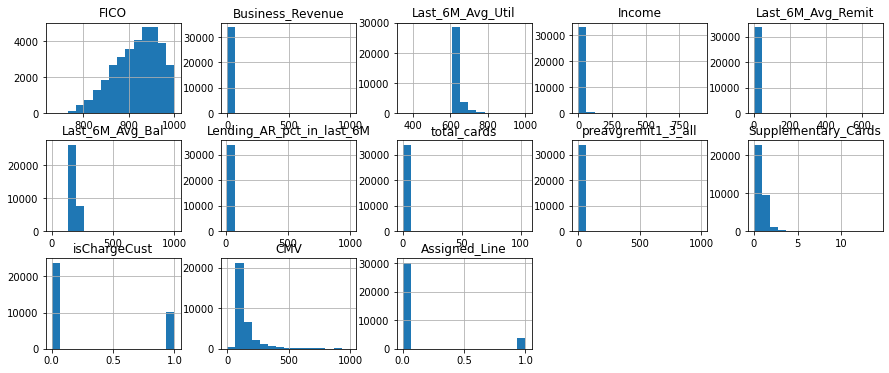

In [117]:
df.hist(bins=15, figsize=(15, 6), layout=(3, 5));

In [118]:
df.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,total_cards,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,917.352042,1.091158,631.570803,15.155880,2.044622,199.987612,55.997108,1.534015,2.081334,0.400029,0.298059,161.355950,0.110206
std,49.931531,12.238524,30.863024,28.278890,8.861633,11.176062,6.678811,1.135234,7.953256,0.684850,0.457412,123.231136,0.313151
min,730.588235,0.001333,347.053355,0.005000,0.353228,0.000000,13.028620,0.000000,0.959315,0.000000,0.000000,0.000000,0.000000
25%,882.352941,0.083333,611.689854,6.636364,0.688661,197.191050,53.266117,1.000000,1.038272,0.000000,0.000000,104.385542,0.000000
50%,924.705882,0.166667,619.802034,10.113636,0.994018,197.903308,58.632548,1.000000,1.259802,0.000000,0.000000,117.493115,0.000000
75%,956.470588,0.555556,637.448377,18.181818,1.731006,199.678033,58.632548,2.000000,1.822333,1.000000,1.000000,159.446213,0.000000
max,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,1000.000000,104.000000,1000.000000,14.000000,1.000000,1000.000000,1.000000


In [119]:
#Now we will treat outliers in df
from scipy.stats import mstats

for x in df:
  df.loc[:,x] = mstats.winsorize(df[x], limits=[0.10, 0.10])
df.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,total_cards,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,918.720433,0.460300,627.612161,11.910777,1.352884,198.788362,55.963430,1.482956,1.543250,0.329235,0.298059,143.354814,0.110206
std,43.226098,0.583653,18.614952,6.317535,0.861933,2.089556,4.220582,0.704510,0.659313,0.469942,0.457412,56.508555,0.313151
min,847.058824,0.027778,611.574748,4.454545,0.577532,196.943312,47.899686,1.000000,0.963437,0.000000,0.000000,97.127367,0.000000
25%,882.352941,0.083333,611.689854,6.636364,0.688661,197.191050,53.266117,1.000000,1.038272,0.000000,0.000000,104.385542,0.000000
50%,924.705882,0.166667,619.802034,10.113636,0.994018,197.903308,58.632548,1.000000,1.259802,0.000000,0.000000,117.493115,0.000000
75%,956.470588,0.555556,637.448377,18.181818,1.731006,199.678033,58.632548,2.000000,1.822333,1.000000,1.000000,159.446213,0.000000
max,977.647059,1.894444,666.901257,22.727364,3.244271,203.391057,58.632548,3.000000,2.998155,1.000000,1.000000,273.774527,1.000000


### EDA